In [69]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [48]:
df1 = quandl.get('WIKI/GOOGL')
print(df1.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [49]:
df1.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [53]:
df= df1[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']].copy()

In [54]:
df['HL_PCT']= (df['Adj. High']- df['Adj. Close'])/df['Adj. Close']*100

In [55]:
df['PCT_CHANGE']= (df['Adj. Close']- df['Adj. Open'])/df['Adj. Open']*100

In [56]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_CHANGE
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [57]:
df.columns

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_CHANGE'],
      dtype='object')

In [58]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHANGE', 'Adj. Volume']]

In [59]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [60]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True)

In [61]:
forecast_out = int(math.ceil(0.01*len(df)))

In [62]:
df['label']=df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [63]:
X = np.array(df.drop(['label'], 1))

X= preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace= True)

y = np.array(df['label'])

[[ 5.03228418e+01  3.71256291e+00  3.24967503e-01  4.46590000e+07]
 [ 5.43226889e+01  7.10922353e-01  7.22700723e+00  2.28343000e+07]
 [ 5.48693765e+01  3.72943327e+00 -1.22788010e+00  1.82561000e+07]
 ...
 [ 1.18159000e+03  4.95941909e-01  4.76194525e-01  2.77496700e+06]
 [ 1.11920000e+03  1.08112938e+00 -7.29098295e-01  5.79888000e+06]
 [ 1.06876000e+03  4.32557356e+00 -2.89384977e+00  3.74246900e+06]]
[  69.0782379    67.83941377   68.91272699 ... 1026.55       1054.09
 1006.94      ]


In [64]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X , y, test_size=0.2)
clf= LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
#print(accuracy)

In [65]:
print(accuracy)

0.9779307442045576


In [66]:
forecast_set = clf.predict(X_lately)

In [68]:
print(forecast_set, accuracy, forecast_out)

[1079.32453032 1093.88220726 1107.81906425 1102.70564806 1096.31318577
 1093.59612971 1091.8925964  1088.8892795  1082.80932106 1078.42943752
 1075.99786498 1095.04683804 1113.58475419 1118.52334822 1133.27949992
 1137.38024382 1136.2263359  1133.50853456 1135.38467672 1153.39243568
 1153.27985543 1163.00484333 1159.71760554 1167.31488148 1187.3638775
 1200.12067329 1194.84034799 1206.44663955 1212.06584137 1210.18134189
 1200.89145331 1206.4741538  1205.00915471 1140.83653346 1088.14319787] 0.9779307442045576 35


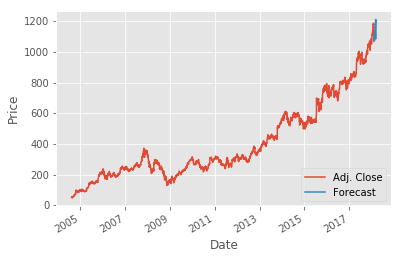

In [70]:
df['Forecast']= np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+= one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()